In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.get_dataset_names()

C:\Users\G V Swetha\anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\G V Swetha\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [149]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [150]:
#Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [151]:
titanic.drop(columns=['who','adult_male','embark_town','alone','alive','class','deck'],inplace=True)

In [152]:
titanic['embarked']= titanic['embarked'].fillna(titanic['embarked'].mode()[0])

In [153]:
titanic['age']=titanic['age'].fillna(titanic['age'].median())
titanic_treated = titanic.fillna({'age':999,'embarked':'Missing'})

In [154]:
for x in titanic_treated.columns:
    if titanic_treated[x].dtype == "object":
        titanic_treated[x]=pd.Categorical(titanic_treated[x]).codes
        

In [155]:
titanic_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int8   
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


In [156]:
titanic.groupby('survived').size()

survived
0    549
1    342
dtype: int64

In [157]:
x=titanic_treated.drop(['survived'],axis=1)
y=titanic_treated['survived']

from sklearn.model_selection import train_test_split
#Create train and test data with 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)



(712, 7)
(179, 7)
(712,)
(179,)


In [158]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf

clf.fit(train_x,train_y)


DecisionTreeClassifier()

DecisionTreeClassifier()

In [159]:
dtree_predicted=clf.predict(test_x)

In [160]:
# Model evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
print("Accuracy Score")
print(metrics.accuracy_score(test_y,dtree_predicted))
print("Precision/Recall Matrix")
print(metrics.classification_report(test_y,dtree_predicted))
print("AUC")
auc=metrics.roc_auc_score(test_y,dtree_predicted)
auc

Accuracy Score
0.7541899441340782
Precision/Recall Matrix
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       110
           1       0.69      0.65      0.67        69

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

AUC


0.7351778656126482

Confusion Matrix


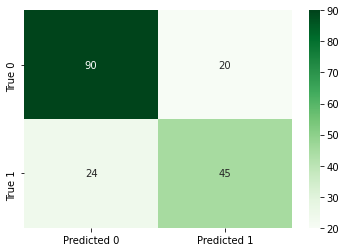

In [161]:
import matplotlib.pyplot as plt
#Confusion matrix for Decision Trees
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,dtree_predicted)
lbl1=["Predicted 0", "Predicted 1"]
lbl2=["True 0", "True 1"]
sns.heatmap(cf,annot=True,cmap='Greens',fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [162]:
my_max_depth =[5,10,15,20,50]
my_criterion = ['gini','entropy']
my_min_samples_leaf = [2,5,10,15,20,25]
my_min_samples_split = [2,5,10,15,50,100]


In [163]:
#number of models 
len(my_max_depth)*len(my_criterion)*len(my_min_samples_leaf)*len(my_min_samples_split)

360

In [164]:
clf

DecisionTreeClassifier()

In [165]:
#Importinh GRidSearch

from sklearn.model_selection import GridSearchCV

In [166]:
train_x.shape

(712, 7)

In [167]:
#Building Model

grid = GridSearchCV(estimator=clf,cv=4,scoring='recall',
                    param_grid=dict(max_depth= my_max_depth,criterion=my_criterion,min_samples_leaf=my_min_samples_leaf,min_samples_split=my_min_samples_split) )

In [168]:
grid.fit(train_x,train_y)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10, 15, 50, 100]},
             scoring='recall')

In [169]:
results=pd.DataFrame(grid.cv_results_)
results.to_csv('results.csv')

',mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score\r\n0,0.003754258155822754,0.0012928678774464704,0.002898693084716797,0.0009293239529637157,gini,5,2,2,"{\'criterion\': \'gini\', \'max_depth\': 5, \'min_samples_leaf\': 2, \'min_samples_split\': 2}",0.5735294117647058,0.75,0.6176470588235294,0.6666666666666666,0.6519607843137255,0.06549210399944799,278\r\n1,0.0027538537979125977,0.00043963912443622773,0.0021249055862426758,0.0002247301264243358,gini,5,2,5,"{\'criterion\': \'gini\', \'max_depth\': 5, \'min_samples_leaf\': 2, \'min_samples_split\': 5}",0.5735294117647058,0.75,0.6176470588235294,0.6666666666666666,0.6519607843137255,0.06549210399944799,278\r\n2,0.0027408599853515625,0.0004312609871227591,0.0019933581352233887,4.5783196376971053e-07,gini,5,2,10,"{\'criterion\': \

In [170]:
predicted= grid.predict(test_x)
from sklearn import metrics
print(metrics.classification_report(test_y,predicted))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [171]:
predicted_prob = grid.predict_proba(test_x)
np.round(predicted_prob,3)

array([[0.75 , 0.25 ],
       [0.915, 0.085],
       [0.438, 0.562],
       [0.   , 1.   ],
       [0.449, 0.551],
       [0.778, 0.222],
       [0.167, 0.833],
       [0.167, 0.833],
       [0.524, 0.476],
       [0.156, 0.844],
       [0.969, 0.031],
       [0.267, 0.733],
       [0.915, 0.085],
       [0.053, 0.947],
       [0.   , 1.   ],
       [0.156, 0.844],
       [0.915, 0.085],
       [0.969, 0.031],
       [0.769, 0.231],
       [0.438, 0.562],
       [0.915, 0.085],
       [0.167, 0.833],
       [0.915, 0.085],
       [0.778, 0.222],
       [0.449, 0.551],
       [0.   , 1.   ],
       [0.611, 0.389],
       [0.156, 0.844],
       [0.053, 0.947],
       [0.87 , 0.13 ],
       [0.959, 0.041],
       [0.267, 0.733],
       [0.915, 0.085],
       [0.778, 0.222],
       [0.969, 0.031],
       [0.778, 0.222],
       [1.   , 0.   ],
       [0.915, 0.085],
       [0.915, 0.085],
       [0.959, 0.041],
       [0.882, 0.118],
       [0.75 , 0.25 ],
       [0.915, 0.085],
       [0.4

In [2]:
predicted_prob=grid.predict_proba(test_x)
predicted_prob
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_prob_df
predicted_classes_df = pd.DataFrame(predicted)
predicted
predicted_classes_df
y_actual_df = pd.DataFrame(test_y.values)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df,y_actual_df],axis=1)
predicted_df.columns=['Prob_0','Prob_1','Predicted_Class','Actual_Class']
predicted_df.sample(20)

NameError: name 'grid' is not defined

In [173]:
#Apply new threshold for optimising Precision and Recall

new_y_test = predicted_prob[:,1]>=0.15

In [174]:
new_y_test

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
        True, False,

In [175]:
print(metrics.classification_report(test_y,new_y_test))

              precision    recall  f1-score   support

           0       0.95      0.63      0.75       110
           1       0.61      0.94      0.74        69

    accuracy                           0.75       179
   macro avg       0.78      0.78      0.75       179
weighted avg       0.82      0.75      0.75       179



In [176]:
predicted_prob

array([[0.75      , 0.25      ],
       [0.91472868, 0.08527132],
       [0.4375    , 0.5625    ],
       [0.        , 1.        ],
       [0.44897959, 0.55102041],
       [0.77777778, 0.22222222],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.52380952, 0.47619048],
       [0.15625   , 0.84375   ],
       [0.96875   , 0.03125   ],
       [0.26666667, 0.73333333],
       [0.91472868, 0.08527132],
       [0.05263158, 0.94736842],
       [0.        , 1.        ],
       [0.15625   , 0.84375   ],
       [0.91472868, 0.08527132],
       [0.96875   , 0.03125   ],
       [0.76923077, 0.23076923],
       [0.4375    , 0.5625    ],
       [0.91472868, 0.08527132],
       [0.16666667, 0.83333333],
       [0.91472868, 0.08527132],
       [0.77777778, 0.22222222],
       [0.44897959, 0.55102041],
       [0.        , 1.        ],
       [0.61111111, 0.38888889],
       [0.15625   , 0.84375   ],
       [0.05263158, 0.94736842],
       [0.86956522, 0.13043478],
       [0.

In [177]:
test_y

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: survived, Length: 179, dtype: int64

In [178]:
#Random Forest

my_estimators = [10,100,1000]
my_max_depth = [5,10,15]
my_criterion = ['gini','entropy']
my_min_samples_leaf = [2,5,10,15]
my_min_samples_split = [2,5,10,15,50,100]


In [179]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced',random_state = 23)

In [180]:
#Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [181]:
grid_rf=GridSearchCV(estimator= forest,cv=4,scoring='recall',param_grid=dict(max_depth=my_max_depth,criterion=my_criterion,min_samples_leaf=my_min_samples_leaf,
                                                                            min_samples_split=my_min_samples_split,n_estimators=my_estimators))

In [182]:
#forest_predicted=grid_rf.predict(test_x)

In [183]:
#grid_rf

In [184]:
#grid_rf.best_estimator_.feature_importances_

In [185]:
#grid_rf.best_score_